In [1]:
using Revise
using LinearAlgebra

import PyCall; py = PyCall
import StatsBase; stat = StatsBase
import PyPlot; plt = PyPlot
import CMF; cmf = CMF
sep = CMF.Separable

include("./sep_plot_settings.jl")

┌ Info: Recompiling stale cache file /home/anthony/.julia/compiled/v1.1/CMF/0J4Dr.ji for CMF [db662885-8e4b-5931-925d-197754c06cb4]
└ @ Base loading.jl:1184
┌ Warning: Package CMF does not have Random in its dependencies:
│ - If you have CMF checked out for development and have
│   added Random as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with CMF
└ Loading Random into CMF from project dependency, future warnings for CMF are suppressed.


set_size

## Load data

In [75]:
scipy_io = py.pyimport("scipy.io")
matfile = scipy_io.loadmat("../../cmf_data/MackeviciusData.mat")
neural = matfile["NEURAL"]
song = matfile["SONG"];

# plt.imshow(song[:, 1:500], aspect=3)
# plt.grid(false)
# plt.show()

In [88]:
Lt = 0.5  # seconds

data = Dict(
    "neural" => neural,
    "song" => song
)
K = Dict(
    "neural" => 3,
    "song" => 3
)
L = Dict(
    "neural" => 12,
    "song" => 20
);

## Fit with multiplicative updates

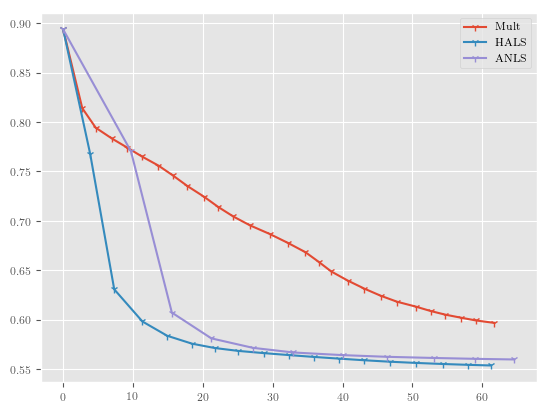

In [119]:
ds = "song"

# rm = CMF.fit_cnmf(
#     data[ds], K=K[ds], L=50,
#     alg=:mult, max_itr=Inf, max_time=60, seed=999
# );


# rh = CMF.fit_cnmf(
#     data[ds], K=K[ds], L=50,
#     alg=:hals, max_itr=Inf, max_time=60, seed=999
# );

# ra = CMF.fit_cnmf(
#     data[ds], K=K[ds], L=50,
#     alg=:anls, max_itr=Inf, max_time=60, seed=999
# );

plt.plot(rm.time_hist, rm.loss_hist, label="Mult")
plt.plot(rh.time_hist, rh.loss_hist, label="HALS")
plt.plot(ra.time_hist, ra.loss_hist, label="ANLS")
plt.legend()
plt.show()

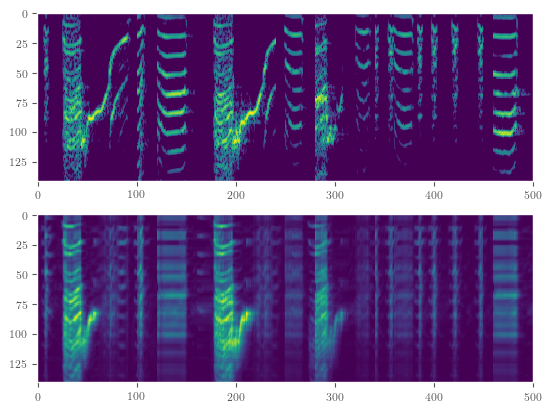

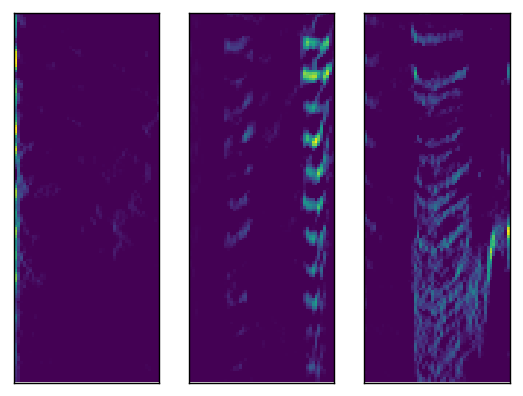

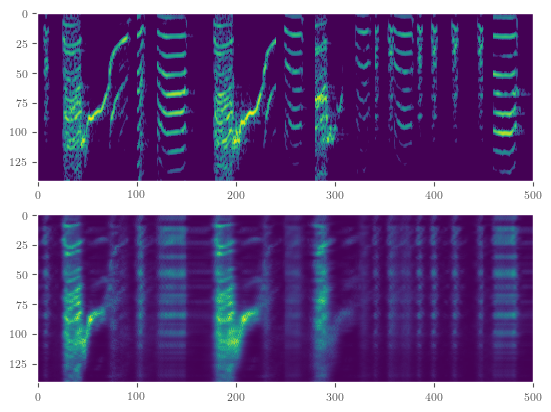

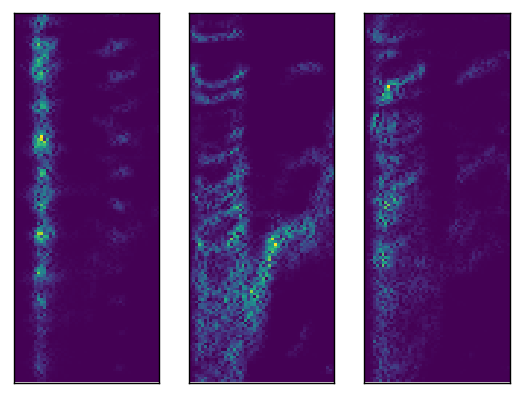

Error: 0.5536131249422793
Iterations: 12


(PyPlot.Figure(PyObject <Figure size 640x480 with 3 Axes>), PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd08e72b470>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd08e7519b0>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd08e6f9f28>])

In [109]:
println("Error: ", cmf.evaluate_mse(rh))
println("Iterations: ", cmf.evaluate_convergence(rh))

cmf.plot_reconstruction(rh, 1000:1500, sort_units=false)
cmf.plot_Ws(rh, sort_units=false)

cmf.plot_reconstruction(rm, 1000:1500, sort_units=false)
cmf.plot_Ws(rm, sort_units=false)

## Fit with LECS

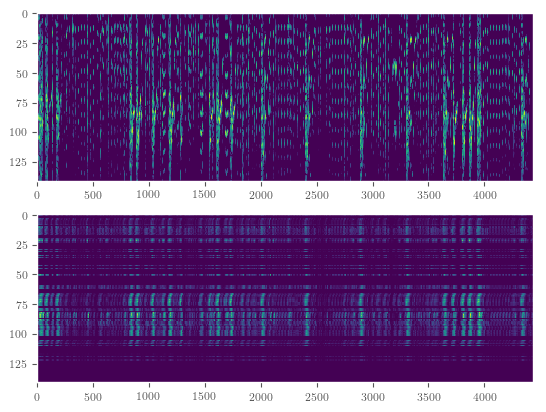

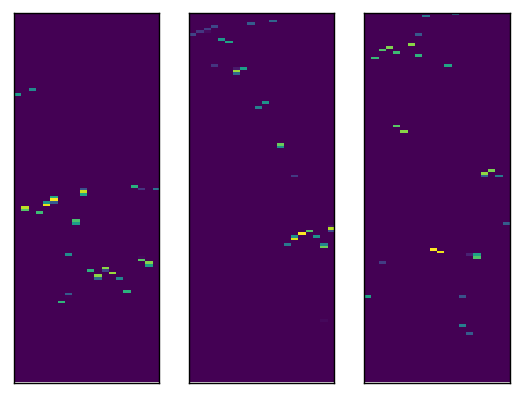

Initial error: 0.8500872551698484


(PyPlot.Figure(PyObject <Figure size 640x480 with 3 Axes>), PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd08e56a7f0>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd08e590d30>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7fd08e5422e8>])

In [120]:
# rs = cmf.fit_cnmf(
#     data[ds], K=K[ds], L=L[ds],
#     alg=:sep, thresh=0
# )

rsh = cmf.fit_cnmf(
    data[ds], K=K[ds], L=L[ds], 
    alg=:hals, max_itr=1, max_time=5,
    initW=rs.W .+ sqrt(eps()),
    initH=rs.H .+ sqrt(eps())
);

println("Initial error: ", cmf.evaluate_mse(rs))
# println("----")
# println("Error: ", cmf.evaluate_mse(rsh))
# println("Iterations: ", cmf.evaluate_convergence(rsh))

cmf.plot_reconstruction(rs, sort_units=false)
cmf.plot_Ws(rs, sort_units=false)